In [ ]:
#kmeans is an unsuprevised learning algorithm that groups data into k clusters
#so the idea is randomly selecting  k initial centroid
# then we calculate the euclidean distance between each datapoint and each of thoses centroid point
#assign each datapoint  to its nearests centroid and calculate the mean of each cluster and repeat the process until convergence


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


X = np.array([[1,2], [1, 4], [8,4], [10,2], [10,4], [10, 10]])
X


array([[ 1,  2],
       [ 1,  4],
       [ 8,  4],
       [10,  2],
       [10,  4],
       [10, 10]])

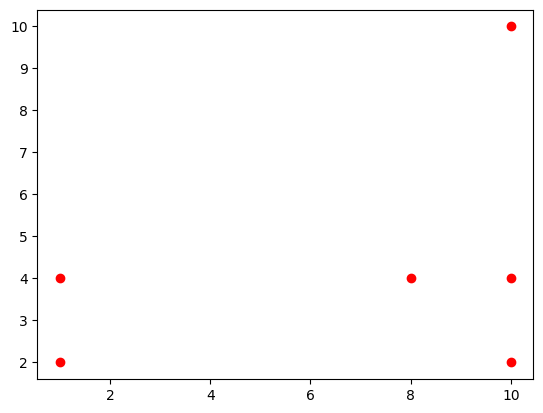

In [16]:
x_1 = X[:,0]
x_2 = X[:,1]

plt.scatter(x_1,x_2, color='red')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.predict(X)
labels


array([1, 1, 0, 0, 0, 0], dtype=int32)

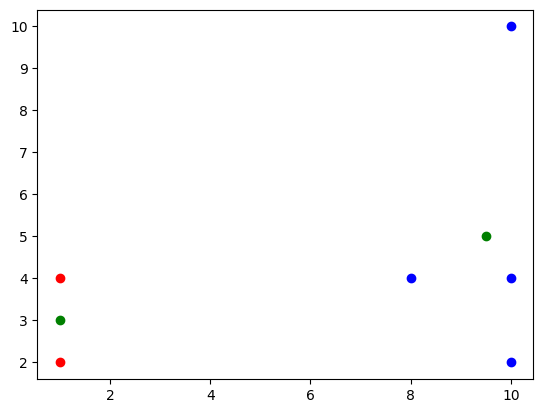

In [34]:
colors = ["blue", "red"]
for i in range(2):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], color="green")
plt.show()

In [36]:
kmeans.predict(np.array([[10,6], [10, 4]]))

array([0, 0], dtype=int32)

In [62]:
x = np.array([[2,7],[3,4],[5,6]])
indices = np.random.choice(len(x), size=2, replace=False)
# print(x[indices].shape)
# print(x[:, np.newaxis].shape)
print(x[:, np.newaxis])
print("="*50)
print(x[indices])


[[[2 7]]

 [[3 4]]

 [[5 6]]]
[[2 7]
 [5 6]]


In [63]:
diff = x[:, np.newaxis] - x[indices]
diff

array([[[ 0,  0],
        [-3,  1]],

       [[ 1, -3],
        [-2, -2]],

       [[ 3, -1],
        [ 0,  0]]])

In [65]:
dist = np.linalg.norm(diff, axis=2)
dist

array([[0.        , 3.16227766],
       [3.16227766, 2.82842712],
       [3.16227766, 0.        ]])

In [72]:
x = np.array([[[1,2],[3,4]], [[5,6],[7,8]]])
x

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [69]:
x.shape

(2, 2, 2)

In [70]:
x.sum(axis=0)

array([[ 6,  8],
       [10, 12]])

In [71]:
x.sum(axis=1)

array([[ 4,  6],
       [12, 14]])

In [73]:
x.sum(axis=2)

array([[ 3,  7],
       [11, 15]])

In [74]:
y = np.array([[1,2], [3,4], [5,6]])
y

array([[1, 2],
       [3, 4],
       [5, 6]])

In [75]:
y.shape

(3, 2)

In [78]:
y.sum(axis=1)

array([ 3,  7, 11])

In [77]:
y.sum(axis=0)

array([ 9, 12])

In [88]:
dist = np.linalg.norm(y, axis=1)
dist

array([2.23606798, 5.        , 7.81024968])

In [91]:
np.argmin(dist, axis=0)

np.int64(0)

In [104]:
import numpy as np
import matplotlib.pyplot as plt



X = np.array([[1,2],
             [1,4],
             [1,0],
             [6,3],
             [10,4],
             [10,0],
             [8, 2]])




In [105]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [ 6,  3],
       [10,  4],
       [10,  0],
       [ 8,  2]])

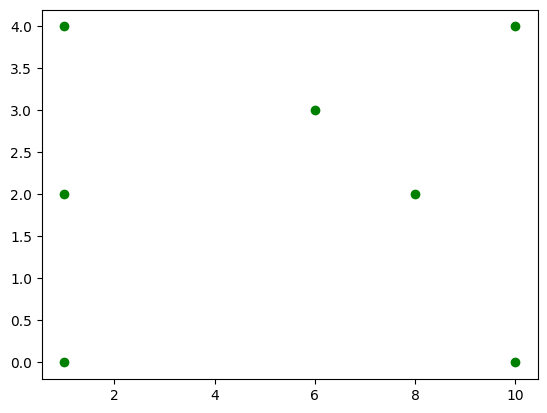

In [106]:
x1 = X[:, 0]
x2 = X[:,1]
plt.scatter(x1, x2, color="green")
plt.show()

In [107]:
#step1 initialize the centroid
k = 2
#create random indices
random_indices = np.random.choice(len(X), size=k, replace=False)
random_indices

array([6, 3])

In [108]:
centroids = X[random_indices]
centroids

array([[8, 2],
       [6, 3]])

In [109]:
X.shape

(7, 2)

In [110]:
centroids.shape

(2, 2)

In [112]:
diff = X[:, np.newaxis]- centroids
diff

array([[[-7,  0],
        [-5, -1]],

       [[-7,  2],
        [-5,  1]],

       [[-7, -2],
        [-5, -3]],

       [[-2,  1],
        [ 0,  0]],

       [[ 2,  2],
        [ 4,  1]],

       [[ 2, -2],
        [ 4, -3]],

       [[ 0,  0],
        [ 2, -1]]])

In [114]:
dist = np.linalg.norm(diff, axis=2)
dist

array([[7.        , 5.09901951],
       [7.28010989, 5.09901951],
       [7.28010989, 5.83095189],
       [2.23606798, 0.        ],
       [2.82842712, 4.12310563],
       [2.82842712, 5.        ],
       [0.        , 2.23606798]])

In [115]:
dist.shape

(7, 2)

In [116]:
# labels = np.argmin(dist, axis=0)
# labels

array([6, 3])

In [117]:
labels = np.argmin(dist, axis=1)
labels

array([1, 1, 1, 1, 0, 0, 0])

iteration:1
new centroids:[[9.33333333 2.        ]
 [2.25       2.25      ]]
iteration:2
new centroids:[[8.5  2.25]
 [1.   2.  ]]
iteration:3
new centroids:[[8.5  2.25]
 [1.   2.  ]]
converged


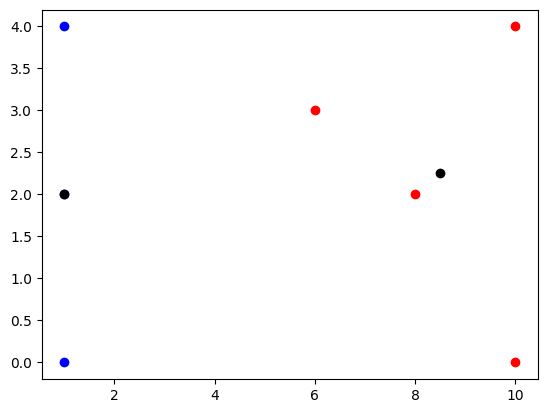

In [123]:
max_iter = 5
for i in range(5):
    print(f"iteration:{i+1}")
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    #update the centroids
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    print(f"new centroids:{new_centroids}")

    if np.all(centroids == new_centroids):
        print("converged")
        break

    centroids = new_centroids

colors = ["red", "blue"]
for j in range(k):
    
    plt.scatter(X[labels==j][:, 0], X[labels ==j][:, 1], color=colors[j])
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker="o")
plt.show()
    
    
    
    